In [1]:
import argparse
import glob
import tensorflow as tf
import pandas as pd
import os.path
from tqdm import tqdm
import math

import matplotlib.pyplot as plt


In [2]:
def plot_range(metric, title, use_max=True):
    y1 = metric.transpose().min()
    y2 = metric.transpose().max()

    fig = plt.figure(figsize=(16, 28))
    plt.suptitle(title, fontsize=14)

    key_sort = list(set([x.split('/')[1] for x in metric.keys()]))
    key_sort.sort()
    key_list = []

    for key in key_sort:
        key_list.append([x for x in metric.keys() if key +'/' in x])

#     print(key_list)   
    # key_list = [[x for x in metric.keys() if 'rgb/' in x]]
    # key_list.append([x for x in metric.keys() if 'rgb_pt' in x])
    # key_list.append([x for x in metric.keys() if 'rgbd' in x])
    # key_list.append([x for x in metric.keys() if 'synthetic' in x])
    # key_list.append([x for x in metric.keys() if 'latefusion' in x])
    # key_list.append([x for x in metric.keys() if 'midfusion' in x])

    n = len(metric.keys())
    cols = max([len(row) for row in key_list])
    rows = len(key_list)

    for i, row in enumerate(key_list):
        row.sort()

        for j, key in enumerate(row):
            x = i*cols + j

            group, title = key.split('/')[1:]
            ax = plt.subplot(rows, cols, x+1)
            if j==0:
                ax.set_ylabel(group, rotation=0, size='large')

            plt.plot(metric.index, metric[key], 'k', linewidth=1)
            plt.fill_between(metric.index, y1, y2, color='b', alpha=0.2)
            plt.title(title)

            style = dict(size=10, color='black')
            if use_max:
                max_idx = metric[key].argmax()
                max_val = metric[key].max()
                ax.text(max_idx, max_val, "{:0.2f}".format(max_val), **style)
            else:
                min_idx = metric[key].argmin()
                min_val = metric[key].min()
                ax.text(min_idx, min_val, "{:0.2f}".format(min_val), **style)

            if j > 0:
                ax.yaxis.set_visible(False)
            if i < rows-1:
                ax.xaxis.set_visible(False)

    plt.show()

    return fig

In [3]:
root = "../run/"
filelist = glob.glob(os.path.join(root, "*", "*", "*", "*events.out.tfevents*"))

In [4]:
filelist

['../run/older/coco_rgb_resnet_scratch/2020_04_10/events.out.tfevents.1586032922.cecilia2-4',
 '../run/older/coco_rgb_resnet_scratch/2020-03-29/events.out.tfevents.1585065510.cecilia3-2',
 '../run/older/cityscapes_hha_midfusion_pretrained/2020_04_06/events.out.tfevents.1585765395.cecilia1-2',
 '../run/older/cityscapes_rgbd_resnet_deeplab/2020-03-30/events.out.tfevents.1585244444.cecilia4-1',
 '../run/older/cityscapes_rgbd_resnet_deeplab/2020-03-30c/events.out.tfevents.1585244088.cecilia4-2',
 '../run/older/cityscapes_rgbd_resnet_deeplab/2020_04_06/events.out.tfevents.1586033368.cecilia2-2',
 '../run/older/cityscapes_synth_rgbd_xception_fine_coarse/2020_04_25-14_32_21/events.out.tfevents.1587825141.wow-xception-6',
 '../run/older/cityscapes_rgbd_xception_fine_coarse/2020_04_28-01_42_47/events.out.tfevents.1588038167.wow-xception-4',
 '../run/older/cityscapes_synthetic/2020_04_10/events.out.tfevents.1586186496.cecilia2-1',
 '../run/older/cityscapes_synthetic/2020-03-30b/events.out.tfeven

In [5]:
sess = tf.compat.v1.InteractiveSession()

df_dict = {}
with sess.as_default():
    for fn in tqdm(filelist):
        index_list = {}
#             output_fn = os.path.join(os.path.split(fn)[0], 'tensorboard.csv')
        try:
            for e in tf.compat.v1.train.summary_iterator(fn):
                if e.step <= 200:
                    for v in e.summary.value:
                        if v.tag != "train/total_loss_iter":
                            if e.step in index_list:
                                index_list[e.step][v.tag] = v.simple_value
                            else:
                                index_list[e.step] = {v.tag: v.simple_value}
        except Exception as e:
            print("{}: {}".format(fn, e.message))

        finally:
            fn_key = os.path.split(fn)[0].replace(root, "")
            df_dict[fn_key] = pd.DataFrame(index_list.values(), index=index_list.keys())

#                 if fn_key == 'rgb/experiment_1':
#                     df_dict['rgb/experiment_1'] = pd.concat([df_dict['rgb/experiment_0'], df_dict['rgb/experiment_1']],
#                                                             axis=0)
#                     del df_dict['rgb/experiment_0']
#                 elif fn_key == 'rgbd/2020-03-06':
#                     df_dict['rgbd/2020-03-06'] = pd.concat([df_dict['rgbd/2020-03-06'], df_dict['rgbd/2020-03-09']],
#                                                             axis=0)
#                     del df_dict['rgbd/2020-03-09']
#                 df_dict[fn_key].to_csv(output_fn)


  0%|          | 0/116 [00:00<?, ?it/s]

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


  6%|▌         | 7/116 [00:07<01:34,  1.15it/s]

../run/older/cityscapes_synth_rgbd_xception_fine_coarse/2020_04_25-14_32_21/events.out.tfevents.1587825141.wow-xception-6: truncated record at 9487438' failed with Read less bytes than requested


 15%|█▍        | 17/116 [00:14<01:28,  1.12it/s]

../run/older/cityscapes_midfusion_xception/2020_04_23/events.out.tfevents.1587229170.morexception-2: truncated record at 29674446' failed with Read less bytes than requested


 18%|█▊        | 21/116 [00:17<01:05,  1.46it/s]

../run/older/cityscapes_rgb_xception_pt/2020_04_16/events.out.tfevents.1586811520.cecilia1-3: truncated record at 19906752' failed with Read less bytes than requested


 22%|██▏       | 26/116 [00:19<00:50,  1.77it/s]

../run/older/scenenet_rgbd_resnet_deeplab/2020-03-24/events.out.tfevents.1583796252.cecilia2: truncated record at 25583345' failed with Read less bytes than requested


 24%|██▍       | 28/116 [00:20<00:47,  1.84it/s]

../run/older/scenenet_rgbd_resnet_deeplab/2020-03-14/events.out.tfevents.1583796252.cecilia2: truncated record at 25583345' failed with Read less bytes than requested


 32%|███▏      | 37/116 [00:30<01:22,  1.04s/it]

../run/older/coco_rgb_resnet_deeplab/2020-03-13/events.out.tfevents.1583853154.cecilia3: truncated record at 29460178' failed with Read less bytes than requested


 33%|███▎      | 38/116 [00:31<01:39,  1.27s/it]

../run/older/coco_rgb_resnet_deeplab/2020_04_10/events.out.tfevents.1586032408.cecilia2-7: truncated record at 47176087' failed with Read less bytes than requested


 37%|███▋      | 43/116 [00:35<00:56,  1.30it/s]

../run/scenenet/scenenet_depthaware/2020_10_21-11_14_00/events.out.tfevents.1602889757.rgbd-7: corrupted record at 19404566


 53%|█████▎    | 61/116 [00:48<00:34,  1.61it/s]

../run/scenenet/scenenet_rgbd_xception_low_light/2020_10_16-23_05_33/events.out.tfevents.1602889533.rgbd-5: truncated record at 37687283' failed with Read less bytes than requested


 64%|██████▍   | 74/116 [00:54<00:38,  1.09it/s]

../run/scenenet/scenenet_rgb_xception_low_light/2020_10_16-22_57_44/events.out.tfevents.1602889064.rgbd-8: truncated record at 44331439' failed with Read less bytes than requested


 66%|██████▌   | 76/116 [00:57<00:48,  1.20s/it]

../run/scenenet/scenenet_rgbd_xception/2020_09_17-22_10_19/events.out.tfevents.1600380619.rgbd3: truncated record at 56126937' failed with Read less bytes than requested


 67%|██████▋   | 78/116 [00:59<00:39,  1.04s/it]

../run/scenenet/scenenet_depthaware_lowlight/2020_10_16-22_58_31/events.out.tfevents.1602889111.rgbd-6: truncated record at 19001290' failed with Read less bytes than requested


 70%|██████▉   | 81/116 [01:01<00:29,  1.17it/s]

../run/cityscapes/cityscapes_rgbd_xception_scenenet_low_light/2020_10_18-02_02_36/events.out.tfevents.1602986556.rgbd-3: corrupted record at 21796084


 78%|███████▊  | 90/116 [01:10<00:23,  1.13it/s]

../run/cityscapes/cityscapes_rgb_xception_pt_fine_coarse/2020_08_03-15_41_22/events.out.tfevents.1596469282.rgbd-synthetic-1: truncated record at 29849921' failed with Read less bytes than requested


 88%|████████▊ | 102/116 [01:17<00:08,  1.74it/s]

../run/cityscapes/cityscapes_hha_latefusion/2020_09_29-03_32_23/events.out.tfevents.1601350343.rgbd-seg-6: truncated record at 15335484' failed with Read less bytes than requested


 92%|█████████▏| 107/116 [01:25<00:13,  1.48s/it]

../run/coco/coco_rgb_xception_scenenet/2020_09_29-16_11_40/events.out.tfevents.1601395900.rgbd-seg-1: truncated record at 17117075' failed with Read less bytes than requested


 94%|█████████▍| 109/116 [01:31<00:15,  2.18s/it]

../run/coco/coco_rgbd_pascal_low_light/2020_08_19-17_41_24/events.out.tfevents.1597858884.rgbd-2: truncated record at 88534281' failed with Read less bytes than requested


100%|██████████| 116/116 [01:37<00:00,  1.19it/s]

../run/coco/coco_xception/2020_08_27-22_52_53/events.out.tfevents.1598568773.rgbd2-1: truncated record at 28304802' failed with Read less bytes than requested


In [6]:
remove = []
for key in df_dict.keys():
    if not "train/total_loss_epoch" in df_dict[key]:
        remove.append(key)
for key in remove:
    del df_dict[key]

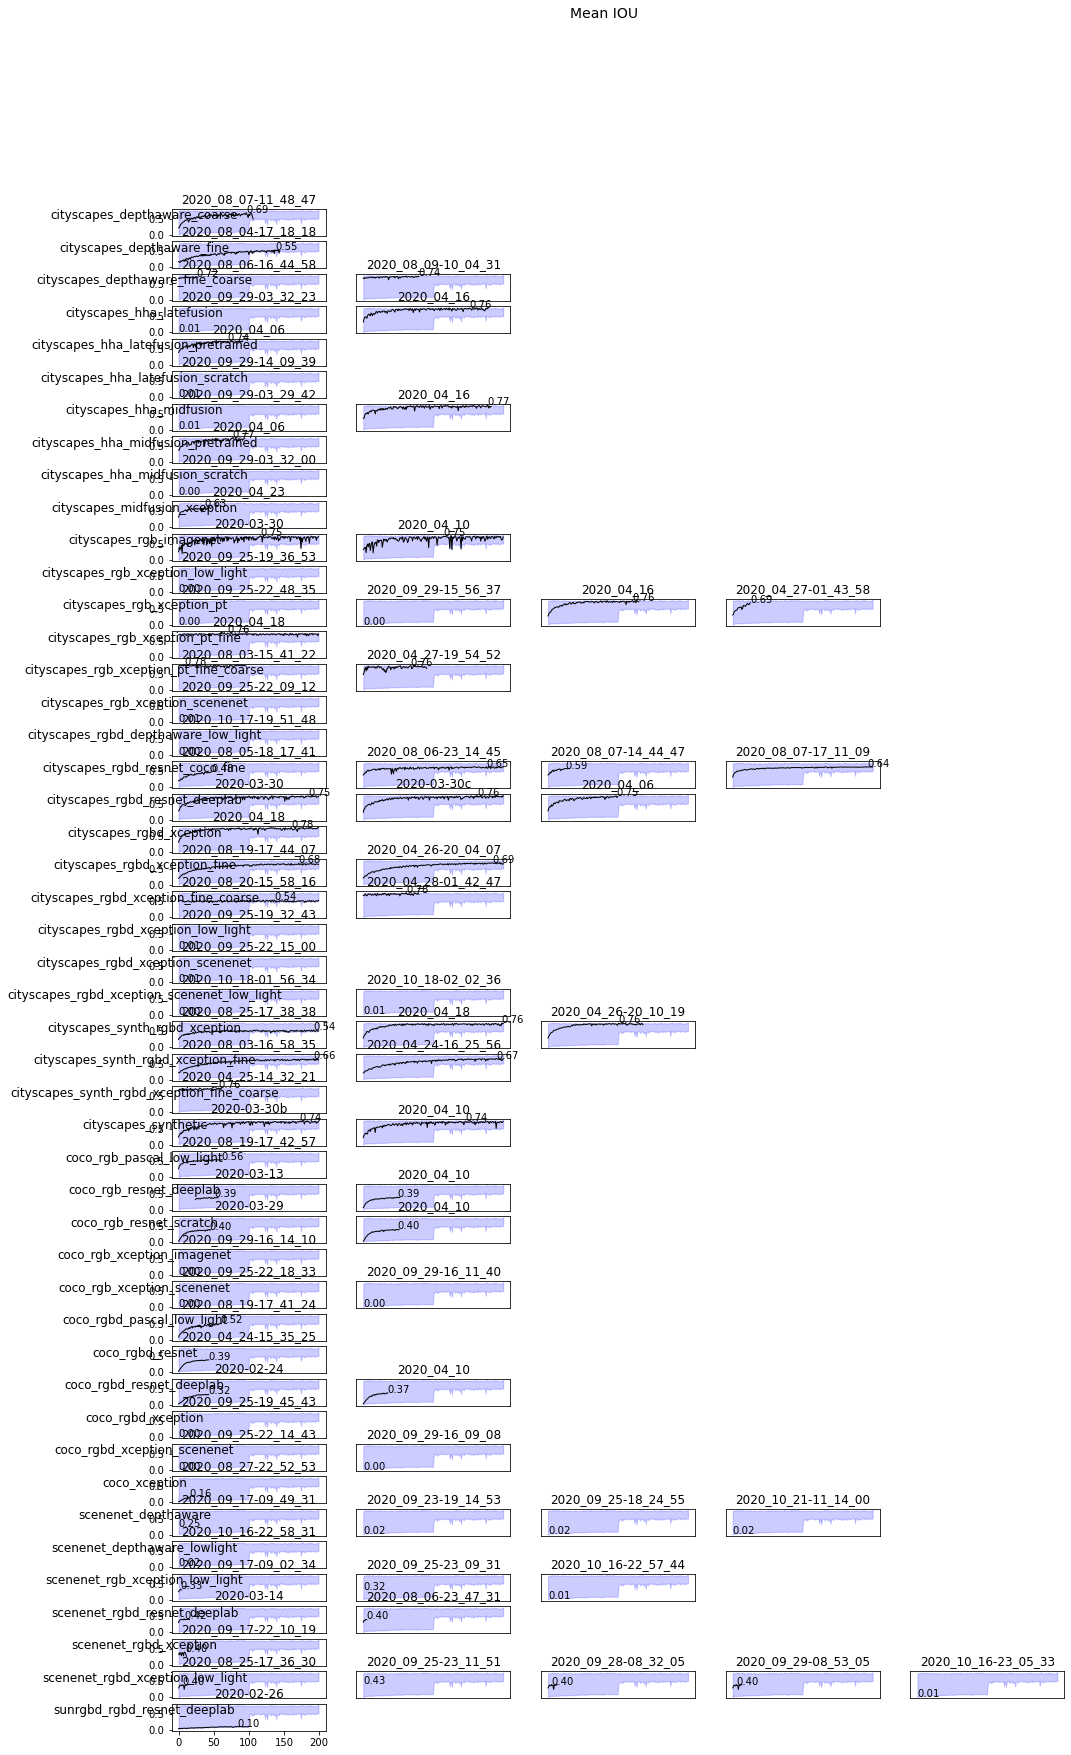

In [15]:
m_iou = pd.concat([df_dict[key]["val/mIoU"] for key in df_dict.keys()], axis=1, keys=df_dict.keys())
fw_iou = pd.concat([df_dict[key]["val/fwIoU"] for key in df_dict.keys() if "val/fwIoU" in df_dict[key]], axis=1, keys=df_dict.keys())
loss = pd.concat([df_dict[key]["train/total_loss_epoch"] for key in df_dict.keys()], axis=1, keys=df_dict.keys())
acc_class = pd.concat([df_dict[key]["val/Acc_class"] for key in df_dict.keys()], axis=1, keys=df_dict.keys())

figs = []
figs.append(plot_range(m_iou, "Mean IOU"))
# figs.append(plot_range(fw_iou, "Frequency Weighted IOU"))
# figs.append(plot_range(loss, "Loss", use_max=False))
# figs.append(plot_range(acc_class, "Class averaged accuracy"))

for i, fig in enumerate(figs):
    fig.show()

In [16]:
from collections import defaultdict
group_keys = {'coco': defaultdict(list),
              'cityscapes_hha': defaultdict(list),
              'cityscapes_rgb': defaultdict(list),
              'cityscapes_rgbd': defaultdict(list),
              'cityscapes': defaultdict(list),
              'scenenet': defaultdict(list),
              'sunrgbd': defaultdict(list)}
              
for key in df_dict.keys():
    short_key = key.split('/')[1]
    if short_key.startswith('coco'):
        group_keys['coco'][short_key].append(key)
    elif short_key.startswith('cityscapes_hha'):
        group_keys['cityscapes_hha'][short_key].append(key)
    elif short_key.startswith('cityscapes_rgbd'):
        group_keys['cityscapes_rgbd'][short_key].append(key)
    elif short_key.startswith('cityscapes_rgb'):
        group_keys['cityscapes_rgb'][short_key].append(key)
    elif short_key.startswith('cityscapes'):
        group_keys['cityscapes'][short_key].append(key)
    elif short_key.startswith('scenenet'):
        group_keys['scenenet'][short_key].append(key)
    elif short_key.startswith('sunrgbd'):
        group_keys['sunrgbd'][short_key].append(key)

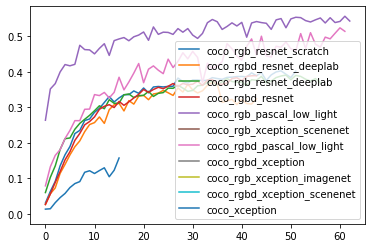

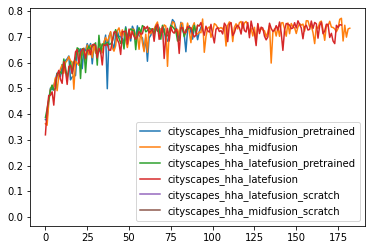

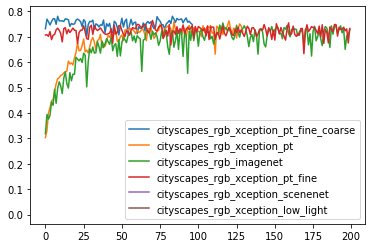

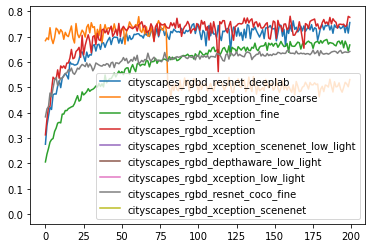

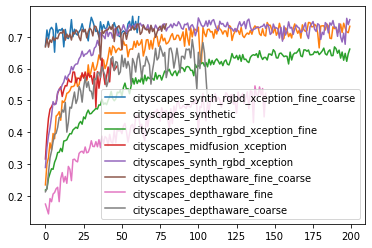

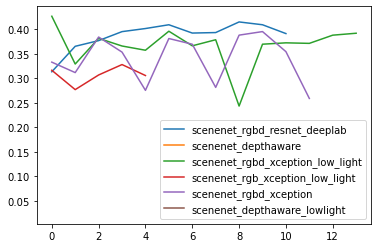

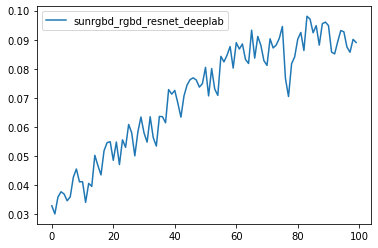

In [18]:
for dataset in group_keys.keys():
    plt.figure()

    key_list = []
    for group_key, group_vals in group_keys[dataset].items():
#         m_iou = [df_dict[key]["val/mIoU"].max() for key in group_vals]
        m_iou = pd.concat([df_dict[key]["val/mIoU"] for key in group_vals], axis=1, keys=[x.split('/')[1] for x in group_vals])
#         plt.scatter(m_iou, range(len(key_list), len(m_iou)+len(key_list)), marker='.')
#         key_list.extend(group_vals)

#         if len(group_vals) > 1:
#             plt.fill_between(m_iou.index, m_iou.transpose().min(), m_iou.transpose().max(), alpha=0.2)
#         else:
        plt.plot(m_iou.transpose().max())

#     plt.yticks(range(len(key_list)), [x.split('/')[1] for x in key_list])
    plt.legend(group_keys[dataset].keys())
    plt.show()

In [ ]:
key_list